In [2]:
import scipy as scipy
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [3]:
df = pd.read_csv('problem1.csv')
df_normalized = pd.read_csv('problem1.csv')

df.head()

print(df)

           x         y
0  -1.166289  1.014680
1  -0.426878  0.262715
2  -1.477892 -1.044772
3   3.049119  0.804363
4  -2.123732 -0.689514
..       ...       ...
95 -0.588599  0.652704
96 -0.218138  0.067676
97  0.342822  1.214472
98  0.337376  0.608974
99  1.153817 -0.683444

[100 rows x 2 columns]


In [4]:
df.skew()


x    0.238973
y    0.294208
dtype: float64

In [6]:
df.kurtosis()

x   -0.202272
y   -0.094838
dtype: float64

x   -0.202272
y   -0.094838
dtype: float64

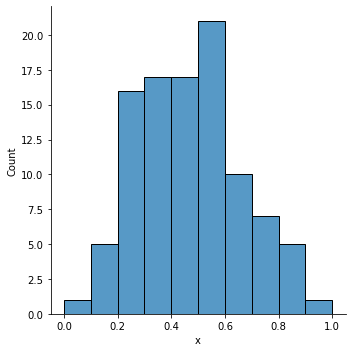

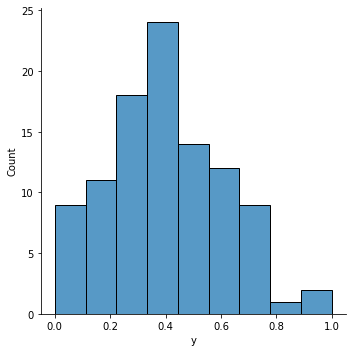

In [5]:
#check if the data is normally distributed
# sns.displot(df['x'])
# sns.displot(df['y'])

#normalize the data for both x and y
scaler = MinMaxScaler()
df_normalized['x'] = scaler.fit_transform(df[['x']])
df_normalized['y'] = scaler.fit_transform(df[['y']])
df_normalized.head()

sns.displot(df_normalized['x'])
sns.displot(df_normalized['y'])

# df_normalized.skew()
df_normalized.kurtosis()


#the print out of kurtosis between -2 and 2 dictates its within acceptable range for normal univariate distribution
#but the non zero shows that there is bias

<AxesSubplot:>

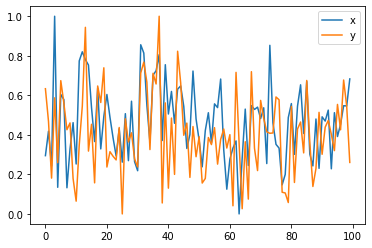

In [6]:
#take the data from problem1.csv and normalize it
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

#plot the normalized data
df_normalized.plot()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              23.69
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                    4.28e-06
Time:                        22:44:45   Log-Likelihood:                         -160.49
No. Observations:                 100   AIC:                                      323.0
Df Residuals:                      99   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Moneybag Mike\AppData\Local\Temp\ipykernel_73744\479541349.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_sum = np.sum(abs(x) for x in error_vector)


94.28287419588395

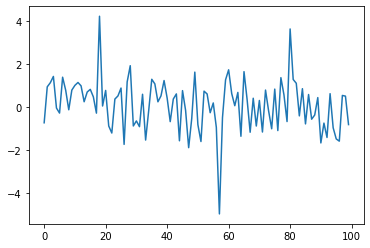

In [7]:

from sklearn.linear_model import LinearRegression


# Read in the data from a CSV file
data = pd.read_csv('problem2.csv')

# Split the data into the predictor variables (X) and the target variable (y)
x = data['x']
y = data['y']

# Create a LinearRegression object and fit it to the data
model = sm.OLS(y,x).fit()
print(model.summary())

error_vector = model.resid
error_vector.plot()
error_sum = np.sum(abs(x) for x in error_vector)
error_sum



0    -0.718671
1     0.955120
2     1.147262
3     1.439575
4    -0.032478
        ...   
95   -1.470443
96   -1.575020
97    0.554699
98    0.522090
99   -0.802468
Length: 100, dtype: float64
MSE: 1.4505091997840902


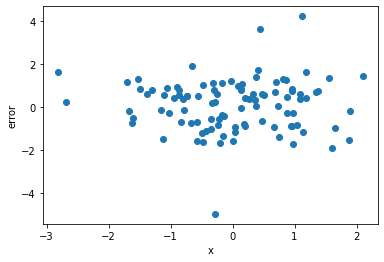

In [11]:
error= model.resid
print(error)

n = len(data)
mse = (1/n) * np.sum(error ** 2)
print("MSE:", mse)
# Plot the residuals
plt.scatter(x, error)
plt.xlabel('x')
plt.ylabel('error')
plt.show()

In [21]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t 

#create a function for Maximum Likelihood Estimator  assuminng normality using the data in problem2.csv
def log_likelihood(residuals, mu, sigma):
    n = len(residuals)
    ll = -n/2*np.log(2*np.pi) - n*np.log(sigma) - 1/(2*sigma**2)*np.sum((residuals-mu)**2)
    return ll

mu = np.mean(error_vector)
sigma = np.std(error_vector)
params = [mu, sigma]
ll = log_likelihood(error_vector,mu,sigma)
print(ll)

def log_likelihood_t(params, residuals):
    df = len(residuals) - 1
    loglik = np.sum(t.logpdf(residuals, df, mu, sigma))
    return loglik

params = [mu, sigma]
loglik = log_likelihood_t(params,error_vector)
print(loglik)


-159.99209669526914
-159.29721858186193


In [20]:
# ##Broken Code do not use
# from scipy.optimize import minimize
# from scipy.stats import t

# import numpy as np
# import matplotlib.pyplot as plt
# #create a function for Maximum Likelihood Estimator using the data in problem2.csv and fit using the assumption of a T distribution of the errors
# def neg_log_likelihood_stat(params, x, y):
#     a, b = params
#     yhat = a + b * x
#     sigma = 1
#     nll = -np.sum(t.logpdf(y, loc=yhat, scale=sigma))
#     return nll

# #read in the data from problem2.csv
# data = pd.read_csv('problem2.csv')

# #split the data into the predictor variables (X) and the target variable (y)
# x = data['x']
# y = data['y']

# #set the initial values for a and b
# initial_guess = [0, 1]

# #use the minimize function to find the values of a and b that minimize the negative log likelihood
# res = minimize(neg_log_likelihood_stat, initial_guess, args=(x, y), method='Nelder-Mead')

# print(res.x)

# #plot the data and the regression line
# plt.scatter(X, y)
# plt.plot(X, res.x[0] + res.x[1] * X, 'r')
# plt.show()

# #calculate the error terms
# error = y - (res.x[0] + res.x[1] * X)

# #plot the error terms
# plt.scatter(X, error)
# plt.show()

TypeError: _parse_args() missing 1 required positional argument: 'df'

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


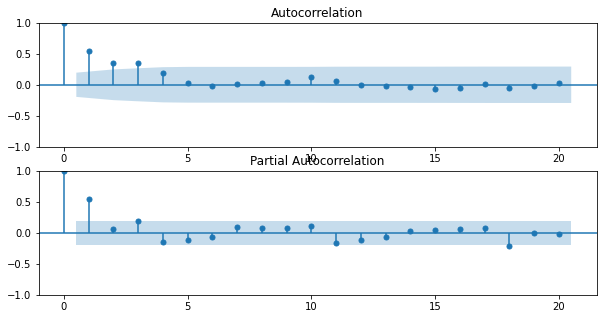

In [14]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt

# simulate AR(1)
arparams = np.array([1, -0.5])
maparams = np.array([1])
data_ar1 = arma_generate_sample(arparams, maparams, nsample=100)

# simulate AR(2)
arparams = np.array([1, 0.5, -0.3])
data_ar2 = arma_generate_sample(arparams, maparams, nsample=100)

# simulate AR(3)
arparams = np.array([1, -0.8, 0.2, 0.5])
data_ar3 = arma_generate_sample(arparams, maparams, nsample=100)

# plot ACF and PACF for AR1 as an example
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5))
plot_acf(data_ar1, lags=20, ax=ax1)
plot_pacf(data_ar1, lags=20, ax=ax2)
plt.show()


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


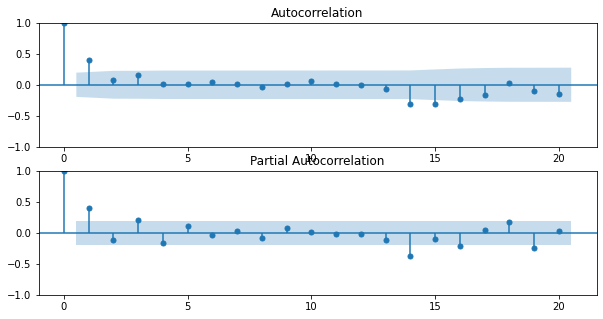

In [15]:
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Simulate MA(1) process
np.random.seed(123)
ar = [1]
ma = [1, 0.5]
y1 = arma_generate_sample(ar, ma, nsample=100)
# Simulate MA(2) process
ar = [1]
ma = [1, -0.5, 0.2]
y2 = arma_generate_sample(ar, ma, nsample=100)

# Simulate MA(3) process
ar = [1]
ma = [1, -0.5, 0.2, 0.1]
y3 = arma_generate_sample(ar, ma, nsample=100)

# Plotting the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5))
plot_acf(y1, lags=20, ax=ax1)
plot_pacf(y1, lags=20, ax=ax2)
plt.show()
